CODE BLOCK: 1

In [1]:
import torch
# import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

/home/shilpi_fire/colab/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/shilpi_fire/colab/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/home/shilpi_fire/colab/lib/python3.10/site-packages/torchvision/image.so: undefined symbol: _ZNK3c107SymBool10guard_boolEPKcl'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


CODE BLOCK: 2

In [2]:
# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)
device = torch.device("cuda" if cuda else "cpu") #added this
device

CUDA Available? False


device(type='cpu')

CODE BLOCK: 3

In [3]:
#imported to utils.

CODE BLOCK: 4

In [4]:
# train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
# test_data = datasets.MNIST('../data', train=False, transform=test_transforms)  #changed this

CODE BLOCK: 5

In [5]:
import sys
sys.path.append('/content/utils.py')  # Add the folder to sys.path
from utils import test_data, train_data

In [3]:
from utils import test_data, train_data  #added this line for assignment

batch_size = 1024 #i believe batch_size should be changed

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}  #changed this, shuffle should be True.

test_loader = torch.utils.data.DataLoader(test_data, **kwargs)#changed this
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

CODE BLOCK: 6

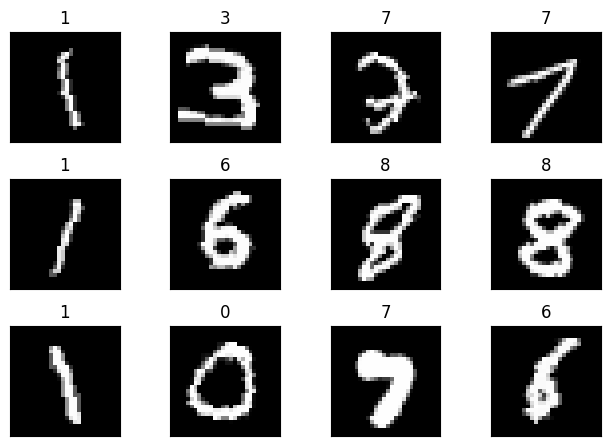

In [4]:
from utils import visualize
# batch_data, batch_label = next(iter(train_loader))

# fig = plt.figure()

# for i in range(12): #if you've set shuffle = False, then every time u run this cell, u'll get same output.
#   plt.subplot(3,4,i+1)
#   plt.tight_layout()
#   plt.imshow(batch_data[i].squeeze(0), cmap='gray')
#   plt.title(batch_label[i].item())
#   plt.xticks([])
#   plt.yticks([])

visualize(train_loader)

CODE BLOCK: 7

In [8]:
# class Net(nn.Module):
#     #This defines the structure of the NN.
#     def __init__(self):
#         super(Net, self).__init__()
#         self.conv1 = nn.Conv2d(1, 32, kernel_size=3) #(in_channels, out_channels)
#         self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
#         self.conv3 = nn.Conv2d(64, 128, kernel_size=3)
#         self.conv4 = nn.Conv2d(128, 256, kernel_size=3)
#         # self.fc1 = nn.Linear(320, 50)#changing 320 to 256
#         self.fc1 = nn.Linear(4096, 50)
#         self.fc2 = nn.Linear(50, 10)

#     def forward(self, x):
#         x = F.relu(self.conv1(x), 2)
#         x = F.relu(F.max_pool2d(self.conv2(x), 2))
#         x = F.relu(self.conv3(x), 2)
#         x = F.relu(F.max_pool2d(self.conv4(x), 2))
#         # print('this is shape of x: ', x.shape)  #torch.Size([512, 256, 4, 4])
#         x = x.view(-1, 4096) # 256 * 4 * 4 = 4096
#         # x = F.relu(self.fc1(x)) #i believe this relu fun needs to be removed
#         x = self.fc1(x)
#         x = self.fc2(x)
#         # print('this is final shape: ', x.shape) #(512, 10)
#         return F.log_softmax(x, dim=1)

CODE BLOCK: 8

In [9]:
# Data to plot accuracy and loss graphs
# train_losses = []
# test_losses = []
# train_acc = []
# test_acc = []

# test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

CODE BLOCK: 9

In [10]:

# from tqdm import tqdm

# def GetCorrectPredCount(pPrediction, pLabels):
#   return pPrediction.argmax(dim=1).eq(pLabels).sum().item()

# def train(model, device, train_loader, optimizer, criterion):
#   model.train()
#   pbar = tqdm(train_loader)

#   train_loss = 0
#   correct = 0
#   processed = 0

#   for batch_idx, (data, target) in enumerate(pbar):
#     data, target = data.to(device), target.to(device)
#     optimizer.zero_grad()

#     # Predict
#     pred = model(data)

#     # Calculate loss
#     loss = criterion(pred, target)
#     train_loss+=loss.item()

#     # Backpropagation
#     loss.backward()
#     optimizer.step()

#     correct += GetCorrectPredCount(pred, target)
#     processed += len(data)

#     pbar.set_description(desc= f'Train: Loss={loss.item():0.4f} Batch_id={batch_idx} Accuracy={100*correct/processed:0.2f}')

#   train_acc.append(100*correct/processed)
#   train_losses.append(train_loss/len(train_loader))

# def test(model, device, test_loader, criterion):
#     model.eval()

#     test_loss = 0
#     correct = 0

#     with torch.no_grad():
#         for batch_idx, (data, target) in enumerate(test_loader):
#             data, target = data.to(device), target.to(device)

#             output = model(data)
#             test_loss += criterion(output, target).item()  # sum up batch loss #changed this
#             #removed parameter : reduction = 'sum' above

#             correct += GetCorrectPredCount(output, target)


#     test_loss /= len(test_loader.dataset)
#     test_acc.append(100. * correct / len(test_loader.dataset))
#     test_losses.append(test_loss)

#     print('Test set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
#         test_loss, correct, len(test_loader.dataset),
#         100. * correct / len(test_loader.dataset)))


CODE BLOCK: 10

In [11]:
import sys
sys.path.append('/content/model.py')  # Add the folder to sys.path
from model import Net, train, test

F is imported


In [12]:
from model import Net, train, test
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9) #changed lr here, most important change
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
criterion = nn.CrossEntropyLoss()
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, criterion)
  test(model, device, test_loader, criterion) #changed this
  scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=2.2050 Batch_id=58 Accuracy=35.31: 100%|██████████| 59/59 [00:21<00:00,  2.70it/s]


Test set: Average loss: 0.0022, Accuracy: 4194/10000 (41.94%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=0.2941 Batch_id=58 Accuracy=72.46: 100%|██████████| 59/59 [00:20<00:00,  2.89it/s]


Test set: Average loss: 0.0002, Accuracy: 9327/10000 (93.27%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.1836 Batch_id=58 Accuracy=92.11: 100%|██████████| 59/59 [00:21<00:00,  2.76it/s]


Test set: Average loss: 0.0001, Accuracy: 9608/10000 (96.08%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.1194 Batch_id=58 Accuracy=94.88: 100%|██████████| 59/59 [00:19<00:00,  2.96it/s]


Test set: Average loss: 0.0001, Accuracy: 9618/10000 (96.18%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.0900 Batch_id=58 Accuracy=95.93: 100%|██████████| 59/59 [00:22<00:00,  2.59it/s]


Test set: Average loss: 0.0001, Accuracy: 9773/10000 (97.73%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=0.1147 Batch_id=58 Accuracy=96.63: 100%|██████████| 59/59 [00:21<00:00,  2.75it/s]


Test set: Average loss: 0.0001, Accuracy: 9805/10000 (98.05%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=0.0773 Batch_id=58 Accuracy=97.11: 100%|██████████| 59/59 [00:20<00:00,  2.94it/s]


Test set: Average loss: 0.0001, Accuracy: 9816/10000 (98.16%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=0.1126 Batch_id=58 Accuracy=97.20: 100%|██████████| 59/59 [00:21<00:00,  2.74it/s]


Test set: Average loss: 0.0000, Accuracy: 9861/10000 (98.61%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=0.0511 Batch_id=58 Accuracy=97.42: 100%|██████████| 59/59 [00:20<00:00,  2.87it/s]


Test set: Average loss: 0.0000, Accuracy: 9846/10000 (98.46%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


Train: Loss=0.0434 Batch_id=58 Accuracy=97.71: 100%|██████████| 59/59 [00:21<00:00,  2.71it/s]


Test set: Average loss: 0.0000, Accuracy: 9886/10000 (98.86%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 11


Train: Loss=0.0709 Batch_id=58 Accuracy=97.88: 100%|██████████| 59/59 [00:21<00:00,  2.75it/s]


Test set: Average loss: 0.0000, Accuracy: 9866/10000 (98.66%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 12


Train: Loss=0.0663 Batch_id=58 Accuracy=98.02: 100%|██████████| 59/59 [00:20<00:00,  2.92it/s]


Test set: Average loss: 0.0000, Accuracy: 9892/10000 (98.92%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 13


Train: Loss=0.0640 Batch_id=58 Accuracy=98.11: 100%|██████████| 59/59 [00:21<00:00,  2.78it/s]


Test set: Average loss: 0.0000, Accuracy: 9893/10000 (98.93%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 14


Train: Loss=0.0724 Batch_id=58 Accuracy=98.14: 100%|██████████| 59/59 [00:21<00:00,  2.75it/s]


Test set: Average loss: 0.0000, Accuracy: 9900/10000 (99.00%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 15


Train: Loss=0.0382 Batch_id=58 Accuracy=98.34: 100%|██████████| 59/59 [00:19<00:00,  2.97it/s]


Test set: Average loss: 0.0000, Accuracy: 9905/10000 (99.05%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 16


Train: Loss=0.0392 Batch_id=58 Accuracy=98.54: 100%|██████████| 59/59 [00:21<00:00,  2.80it/s]


Test set: Average loss: 0.0000, Accuracy: 9913/10000 (99.13%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 17


Train: Loss=0.0613 Batch_id=58 Accuracy=98.53: 100%|██████████| 59/59 [00:21<00:00,  2.75it/s]


Test set: Average loss: 0.0000, Accuracy: 9918/10000 (99.18%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 18


Train: Loss=0.0591 Batch_id=58 Accuracy=98.57: 100%|██████████| 59/59 [00:20<00:00,  2.92it/s]


Test set: Average loss: 0.0000, Accuracy: 9918/10000 (99.18%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 19


Train: Loss=0.0380 Batch_id=58 Accuracy=98.57: 100%|██████████| 59/59 [00:21<00:00,  2.69it/s]


Test set: Average loss: 0.0000, Accuracy: 9919/10000 (99.19%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 20


Train: Loss=0.0306 Batch_id=58 Accuracy=98.56: 100%|██████████| 59/59 [00:21<00:00,  2.77it/s]


Test set: Average loss: 0.0000, Accuracy: 9918/10000 (99.18%)

Adjusting learning rate of group 0 to 1.0000e-03.


CODE BLOCK: 11

Text(0.5, 1.0, 'Test Accuracy')

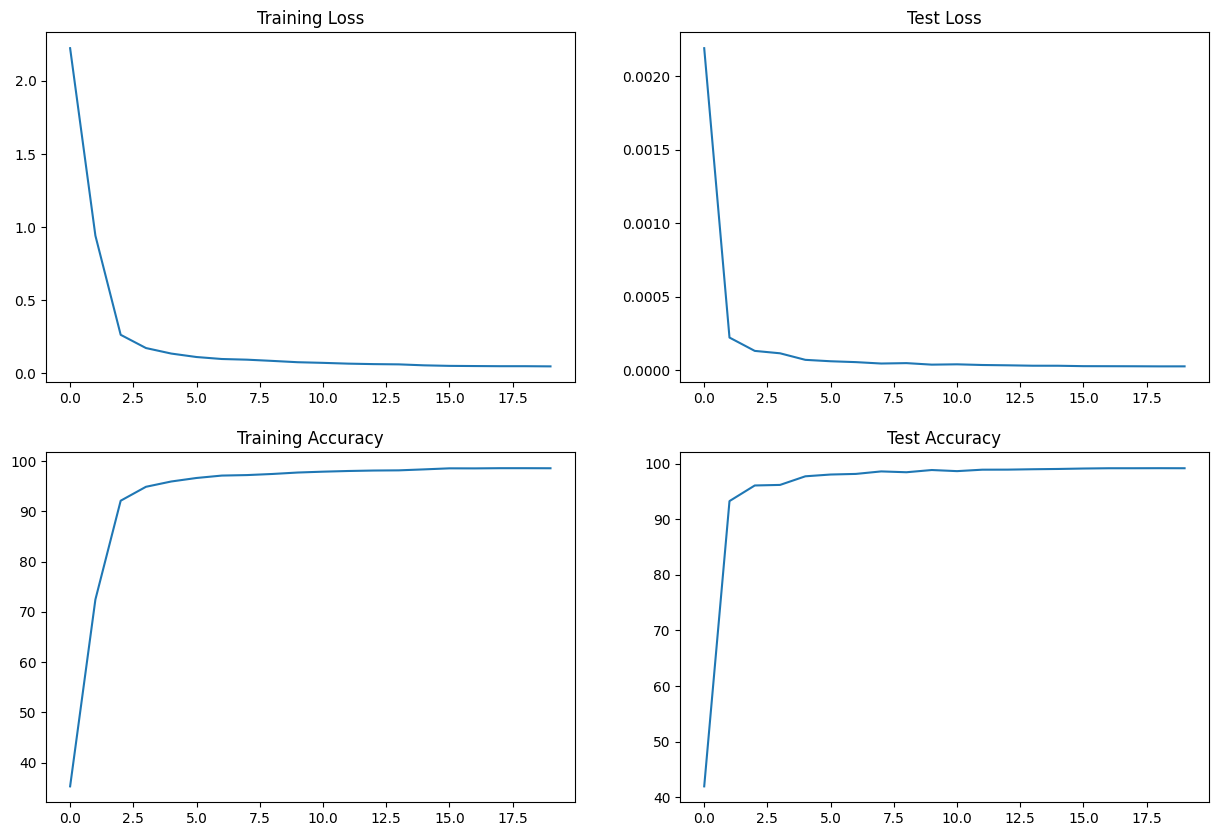

In [13]:
from model import train_losses, test_losses, train_acc, test_acc
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")

In [14]:
# pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
            Conv2d-2           [-1, 64, 24, 24]          18,496
            Conv2d-3          [-1, 128, 10, 10]          73,856
            Conv2d-4            [-1, 256, 8, 8]         295,168
            Linear-5                   [-1, 50]         204,850
            Linear-6                   [-1, 10]             510
Total params: 593,200
Trainable params: 593,200
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 2.26
Estimated Total Size (MB): 2.94
----------------------------------------------------------------
